In [1]:
import pandas as pd
import requests
from nltk import FreqDist
from nltk.corpus import stopwords
import plotly.express as px
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import numpy as np
import re

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

In [4]:
spam = pd.read_csv("./data/spam_ham.txt",sep="\t",names=["label","messages"])

In [5]:
spam

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
spam['messages'] = spam['messages'].astype(str)

In [7]:
#Preprocess
corpus = []
for i in range(0,len(spam)):
  result = re.sub('[^a-zA-Z]',' ',spam['messages'][i])
  result = result.lower()
  result = result.split()
  result = [lemmatizer.lemmatize(x) for x in result if not x in stopwords.words('english')]
  result = " ".join(result)
  corpus.append(result)

In [8]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 4000)

In [10]:
vector_learner = vectorizer.fit(corpus)

In [11]:
X = vector_learner.transform(corpus).toarray()

In [12]:
X_df = pd.DataFrame(X,columns=vectorizer.get_feature_names_out())
print(X_df.head(5))
print(X_df.shape)

   aah  aathi  abi  ability  abiola  abj  able  absolutly  abt  abta  ...  \
0  0.0    0.0  0.0      0.0     0.0  0.0   0.0        0.0  0.0   0.0  ...   
1  0.0    0.0  0.0      0.0     0.0  0.0   0.0        0.0  0.0   0.0  ...   
2  0.0    0.0  0.0      0.0     0.0  0.0   0.0        0.0  0.0   0.0  ...   
3  0.0    0.0  0.0      0.0     0.0  0.0   0.0        0.0  0.0   0.0  ...   
4  0.0    0.0  0.0      0.0     0.0  0.0   0.0        0.0  0.0   0.0  ...   

   zealand  zebra  zed  zero   zf  zhong  zindgi  zoe  zogtorius  zoom  
0      0.0    0.0  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0  
1      0.0    0.0  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0  
2      0.0    0.0  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0  
3      0.0    0.0  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0  
4      0.0    0.0  0.0   0.0  0.0    0.0     0.0  0.0        0.0   0.0  

[5 rows x 4000 columns]
(5572, 4000)


In [13]:
y = spam['label'].replace({ 'spam': 1, 'ham': 0})

In [14]:
print(y.shape)
print(y.head())

(5572,)
0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [15]:
from sklearn.svm import SVC #
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3733, 4000)
(1839, 4000)
(3733,)
(1839,)


In [17]:
model = SVC(C=100, gamma=0.01)
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_train_pred,labels=model.classes_)

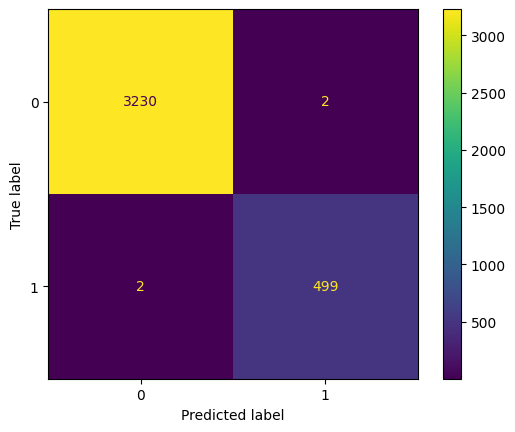

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

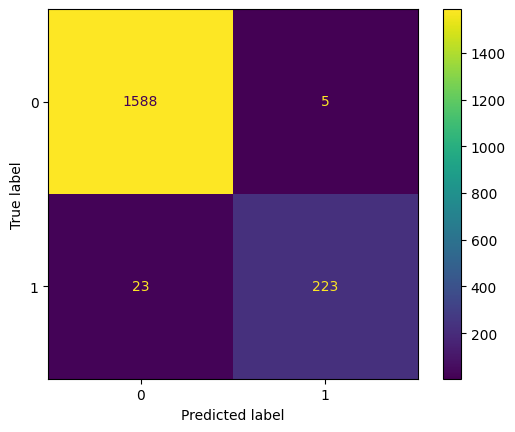

In [20]:
y_test_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred,labels=model.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp2.plot()

In [25]:
def classifier(text:str)->str:
  text = [text]
  sms = vector_learner.transform(text).toarray()
  pred_inp = model.predict(sms)
  if pred_inp == 0:
    return "The Email is not Spam"
  elif pred_inp == 1:
    return "The Email is Spam"
  else:
    return "Invalid Input"

In [26]:
email = "'You have earned 50000 clicke the link now and reddem your prize !!!'"
classifier(email)

'The Email is Spam'